In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, ranksums, mannwhitneyu, kendalltau
import matplotlib.pyplot as plt
from collections import Counter
from itertools import permutations 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

ID #1: Omri Newman 806646

### A) High level description of the data and some pre-processing

In [3]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', index_col=False, encoding = 'unicode_escape', header=None)
# remove unwanted data
df=df[59:]

# transpose df - make the classes a column rather than row
df = df.T
classes = df.iloc[0]
classes.index.name = None
df = df[1:]
df.columns = classes

df = df.reset_index(drop=True)

In [4]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
1,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
2,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
3,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
4,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.55878,5.429437,4.48794,4.254286,5.375811
95,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.88208,3.744138
96,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
97,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.48528,2.711413,2.833818,3.52341,3.812564


#### 1) How many genes profiled? 

In [5]:
df.shape

(99, 54677)

54675 genes were profiled (the columns in our dataframe, minus 2 because one column is the class and another is the ID).

#### 2) How many samples (subjects/patients) in total?

There are 99 subjects in total (each row in our dataframe).

#### 3) How many samples in each class?

In [6]:
Counter(df['Class'])

Counter({'H': 50, 'M': 49})

There are 50 healthy samples and 49 samples with myocardial infarction.

#### 4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [7]:
df.dropna(axis='columns', inplace=True)

In [8]:
df.shape

(99, 54630)

After removing any rows with missing values, we are now left with only 54630 rows (54628 genes).

#### 5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

In [9]:
# randomly sample 20 rows from df (genes_)
gene_sample = df.sample(n=20,axis='columns', random_state=222)
gene_sample['Class'] = df['Class'] # add back class column
# melt so we can plot
gene_sample = pd.melt(gene_sample, id_vars='Class', var_name= 'gene', value_name= 'expression')
gene_sample = gene_sample.convert_dtypes()
gene_sample['expression'] = pd.to_numeric(gene_sample['expression'])

# for plotting purposes
gene_sample['Class'] = gene_sample['Class'].replace('H', 'Healthy')
gene_sample['Class'] = gene_sample['Class'].replace('M', 'Myocardial Infarction')
gene_sample

,Class,gene,expression
0,Healthy,222132_s_at,8.971078
1,Healthy,222132_s_at,8.740949
2,Healthy,222132_s_at,8.980808
3,Healthy,222132_s_at,9.313134
4,Healthy,222132_s_at,8.931673
...,...,...,...
1975,Myocardial Infarction,1560397_s_at,5.904308
1976,Myocardial Infarction,1560397_s_at,5.630873
1977,Myocardial Infarction,1560397_s_at,4.438166
1978,Myocardial Infarction,1560397_s_at,6.750703


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '222132_s_at'),
  Text(1, 0, '1554245_x_at'),
  Text(2, 0, '1560189_at'),
  Text(3, 0, '236633_at'),
  Text(4, 0, '207260_at'),
  Text(5, 0, '221113_s_at'),
  Text(6, 0, '232321_at'),
  Text(7, 0, '225474_at'),
  Text(8, 0, '218418_s_at'),
  Text(9, 0, '1557353_at'),
  Text(10, 0, '216727_at'),
  Text(11, 0, '1560353_at'),
  Text(12, 0, '236478_at'),
  Text(13, 0, '1557147_a_at'),
  Text(14, 0, '227479_at'),
  Text(15, 0, '231717_s_at'),
  Text(16, 0, '1557161_at'),
  Text(17, 0, '230970_at'),
  Text(18, 0, '215131_at'),
  Text(19, 0, '1560397_s_at')])

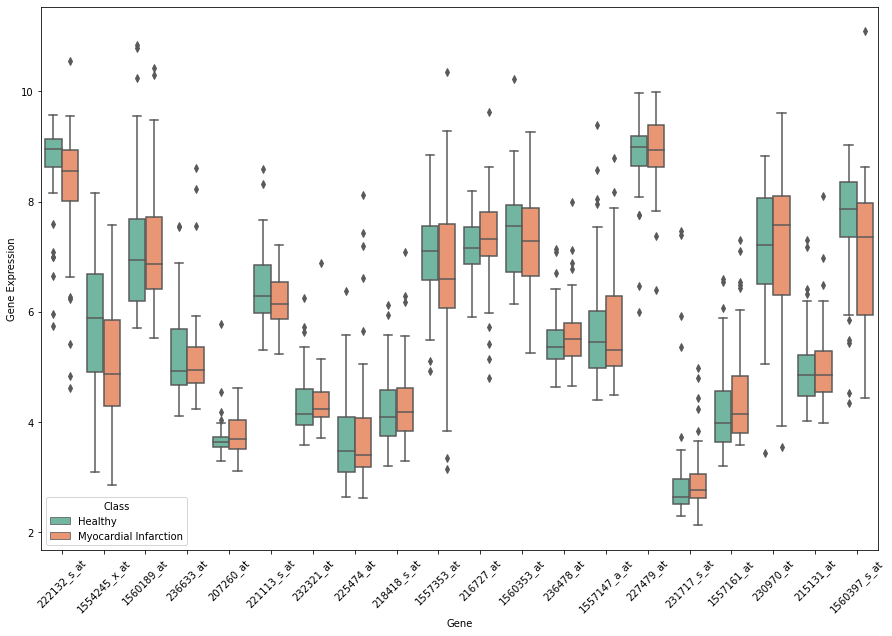

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x="gene", y="expression", data= gene_sample, hue='Class', palette='Set2')

plt.xlabel('Gene')
plt.ylabel('Gene Expression')
plt.xticks(rotation=45)


### B) WRS for differential expression (DE)

#### 1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

The null model says that all possible permutations of ranks (M vs. D) are equiprobable. There are 99 subjects in our data, so 99 ranks in total, and the null model places the gene right in the middle (rank 50). There are 50 healthy samples and 49 samples with myocardial infarction. 

$E(T) = (50)(49) = 2450$

#### 2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

The maximum value of RS(g) happens when all 49 M samples take the position of the highest ranks (ie. in the rank ordering the first 50 samples are healthy and the last 49 have myocardian infarction).

$c = 51+52+...+99 = \frac{(51+99)(99-51+1)}{2} = 3675$

#### 3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

The null model says that all possible permutations of ranks (M vs. D) are equiprobable. The probability under the null model that RS(g)=c is the probability that out of all possible permutations, we get the permutation that places all 49 M samples in the highest rank positions. The general formula for this is (# of ways to get RS(g)=c)/(total # of possible permutations).
In this case, this specific permutation can only happen in 1 way (only 1 possible permutation). The denominator is the total number of possible permutations, which refers to the different number of ways we can arrange the 49 M ranks in the 99 total ranks, which can be computed by $99 \choose 49$.
P(RS(g)=c) = 1/total # of possible permutations.

$ P(RS(g)=c) = \frac{1}{99 \choose 49}$


#### 4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

To get RS(g)=c-1, we need to have the same permutation as above, but the first M rank is in position 50, then 1 H rank, then the rest of the M ranks in the 48 last positions as above. Like before, there is only one way to get this configuration (1 possible permutation). Therefore, the formula for the probability is the same:

$P(RS(g)=c) = \frac{1}{99 \choose 49}$.

To get RS(g)=c-2, we have two possible configurations. In the first, we have the first M rank in position 49, then 2 H ranks, then the last 52-99 ranks as M's. Another possible configuration is placing the first 2 M ranks in position 50 and 51, then 1 H rank in position 52, then the remaining ranks in positions 53-99 as M's. Both of these configurations will reduce the total sum of ranks for M by 2. Therefore, the formula for the probability is the same but the numerator is incremented by one (because we now have 2 possible configurations):

$P(RS(g)=c) = \frac{2}{99 \choose 49}$.

#### 5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [11]:
# calculate ranks of each gene
ranks = df.iloc[:,2:].rank()

# sum the ranks of only M
df_M = (df['Class'] == 'M') # bool
ranks = ranks[df_M].sum() # get sum of M ranks for each gene

# compute IQR
q75, q25 = np.percentile(ranks, [75 ,25])
iqr = q75 - q25

Text(0.7, 0.7, 'IQR =328.0')

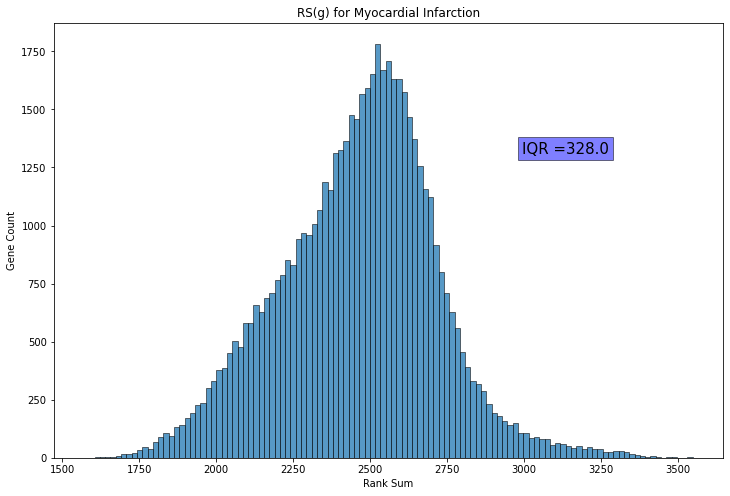

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=ranks, ax=ax)
ax.set(title="RS(g) for Myocardial Infarction", xlabel="Rank Sum", ylabel="Gene Count")
ax.text(0.7,0.7, "IQR ={}".format(iqr), size=15,transform=ax.transAxes, bbox=dict(facecolor='blue', alpha=0.5))

### C) Differential Expression
The purpose is to determine the statistical significance of
differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene,
using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at
a p-value better (≤) than 0.07 and separately genes
underexpressed in M vs H (M < H) at a p-value better than 0.07.
For both directions use both a Student t-test and a WRS test.

#### Number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07:

In [13]:
df = df.apply(pd.to_numeric, errors='ignore')

In [14]:
df_H = (df['Class'] == 'H')
df_M = (df['Class'] == 'M')

results_ttest_over = {}
for col in df.iloc[:,2:]:
    results = ttest_ind(df[col][df_M], df[col][df_H], alternative='greater')
    results_ttest_over[col] = results
    
results_wilcoxon_over = {}
for col in df.iloc[:,2:]:
    results = ranksums(df[col][df_M], df[col][df_H], alternative='greater')
    results_wilcoxon_over[col] = results

In [15]:
ttest_overexpressed = 0
for gene in list(results_ttest_over.values()):
    # make sure the t-test statistic is positive
    if gene[1] <= 0.07:
        ttest_overexpressed += 1
        
wilcoxon_overexpressed = 0
for gene in list(results_wilcoxon_over.values()):
    if gene[1] <= 0.07:
        wilcoxon_overexpressed += 1

In [16]:
print('Number of genes overexpressed in M vs H (t-test):', ttest_overexpressed)
print('Number of genes overexpressed in M vs H (WRS):', wilcoxon_overexpressed)

Number of genes overexpressed in M vs H (t-test): 8517
Number of genes overexpressed in M vs H (WRS): 10787


#### Number of genes underexpressed in M vs H (M < H) at a p-value better than 0.07:

In [17]:
results_ttest_under = {}
for col in df.iloc[:,2:]:
    results = ttest_ind(df[col][df_M], df[col][df_H], alternative='less')
    results_ttest_under[col] = results
    
results_wilcoxon_under = {}
for col in df.iloc[:,2:]:
    results = ranksums(df[col][df_M], df[col][df_H], alternative='less')
    results_wilcoxon_under[col] = results

In [18]:
ttest_underexpressed = 0
for gene in list(results_ttest_under.values()):
    # make sure the t-test statistic is positive
    if gene[1] <= 0.07:
        ttest_underexpressed += 1
        
wilcoxon_underexpressed = 0
for gene in list(results_wilcoxon_under.values()):
    if gene[1] <= 0.07:
        wilcoxon_underexpressed += 1

In [19]:
print('Number of genes underexpressed in M vs H (t-test):', ttest_underexpressed)
print('Number of genes underexpressed in M vs H (WRS):', wilcoxon_underexpressed)

Number of genes underexpressed in M vs H (t-test): 8639
Number of genes underexpressed in M vs H (WRS): 10667


### D) Correlations
Select the 80 most significant genes from each one of the onesided WRS DE lists you computed in 3c. Generate a set of 160
genes, D, which is the union of the above two sets.

In [20]:
over = pd.DataFrame.from_dict(results_wilcoxon_over, orient='index')
over = over.sort_values('pvalue')

under = pd.DataFrame.from_dict(results_wilcoxon_under, orient='index')
under = under.sort_values('pvalue')

D = pd.concat([over[:80], under[:80]])

In [21]:
D

,statistic,pvalue
208869_s_at,7.691398,7.276809e-15
216248_s_at,7.663404,9.053458e-15
204622_x_at,7.348469,1.002448e-13
244054_at,7.229494,2.423984e-13
203887_s_at,7.215497,2.686869e-13
...,...,...
235779_at,-5.007457,2.757695e-07
242874_at,-5.003958,2.808256e-07
1565882_at,-4.996959,2.912071e-07
224879_at,-4.989961,3.019582e-07


#### 1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap. 

In [22]:
results_kendall = {}
for gene1, row1 in D.iterrows():
    for gene2, row2 in D.iterrows():

        if (gene1 != gene2): #and (gene1 +'@'+ gene2 not in results_kendall) and (gene2 +'@'+ gene1 not in results_kendall):
            
            # make sure genes aren't the same and that the permutation hasn't been computed already
            # leave the opposite permutation because needed for heatmap
            results = kendalltau(df[gene1], df[gene2])
            results_kendall[gene1 +'@'+ gene2] = results
            

In [23]:
kendall_corr = pd.DataFrame.from_dict(results_kendall).T
kendall_corr = kendall_corr.iloc[:,:-1]
kendall_corr['index'] = kendall_corr.index

# split col back into the 2 separate gene names 
kendall_corr[['gene1','gene2']] = kendall_corr['index'].str.split('@',expand=True)
# drop extra col and reset the index
kendall_corr = kendall_corr.drop('index', axis=1)
kendall_corr = kendall_corr.reset_index(drop=True)
kendall_corr = kendall_corr.rename(columns={0: 'kendall'})
kendall_corr

,kendall,gene1,gene2
0,0.664399,208869_s_at,216248_s_at
1,0.617811,208869_s_at,204622_x_at
2,0.433519,208869_s_at,244054_at
3,0.419913,208869_s_at,203887_s_at
4,0.408369,208869_s_at,203888_at
...,...,...,...
25435,0.372088,227626_at,222108_at
25436,0.459175,227626_at,235779_at
25437,0.319316,227626_at,242874_at
25438,0.385281,227626_at,1565882_at


Note: while originally this dataframe contained 12720 rows (160 choose 2, we decided to leave in the opposite duplicates because they were required for plotting the heatmap. So this dataframe purposely contains each correlation twice for a total of 25440 rows.

In [24]:
corr_matrix = pd.pivot_table(kendall_corr, index="gene1", columns="gene2", values="kendall", fill_value=1, sort=False)

# rearrange matrix to be symmetrical (for better plotting)
cols = corr_matrix.index
corr_matrix = corr_matrix[cols]
corr_matrix

gene2,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,221081_s_at,235310_at,230428_at,222108_at,235779_at,242874_at,1565882_at,224879_at,227626_at
gene1,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.664399,0.617811,0.433519,0.419913,0.408369,0.475984,0.584003,0.489177,0.457019,...,-0.345702,-0.217069,-0.285920,-0.255824,-0.234385,-0.281856,-0.346526,-0.377036,-0.216656,-0.323026
216248_s_at,0.664399,1.000000,0.851165,0.448361,0.386106,0.386931,0.466089,0.555968,0.484230,0.450423,...,-0.415791,-0.326737,-0.335395,-0.289631,-0.268192,-0.349485,-0.416615,-0.401773,-0.238095,-0.417852
204622_x_at,0.617811,0.851165,1.000000,0.457019,0.373325,0.392290,0.442589,0.554731,0.450010,0.400536,...,-0.400536,-0.319728,-0.324263,-0.280148,-0.267780,-0.354845,-0.411255,-0.404659,-0.261596,-0.400124
244054_at,0.433519,0.448361,0.457019,1.000000,0.522160,0.531231,0.534529,0.562564,0.460317,0.576582,...,-0.226139,-0.281385,-0.244692,-0.297877,-0.313544,-0.308247,-0.337456,-0.261596,-0.327974,-0.340342
203887_s_at,0.419913,0.386106,0.373325,0.522160,1.000000,0.783137,0.495362,0.476397,0.468975,0.466502,...,-0.178726,-0.263657,-0.204700,-0.244692,-0.233972,-0.219588,-0.307359,-0.211709,-0.229437,-0.232736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235779_at,-0.281856,-0.349485,-0.354845,-0.308247,-0.219588,-0.260000,-0.194021,-0.171753,-0.151134,-0.245155,...,0.359794,0.437732,0.411340,0.341237,0.371340,1.000000,0.234021,0.259175,0.275670,0.459175
242874_at,-0.346526,-0.416615,-0.411255,-0.337456,-0.307359,-0.282622,-0.274376,-0.302412,-0.292517,-0.304886,...,0.197691,0.287570,0.137085,0.266131,0.195217,0.234021,1.000000,0.419501,0.252525,0.319316
1565882_at,-0.377036,-0.401773,-0.404659,-0.261596,-0.211709,-0.195217,-0.255411,-0.315605,-0.305710,-0.231499,...,0.320552,0.226551,0.322614,0.283447,0.217481,0.259175,0.419501,1.000000,0.151927,0.385281


[Text(0.5, 1.0, 'Kendall Correlations for 160 Most Differentially Expressed Genes')]

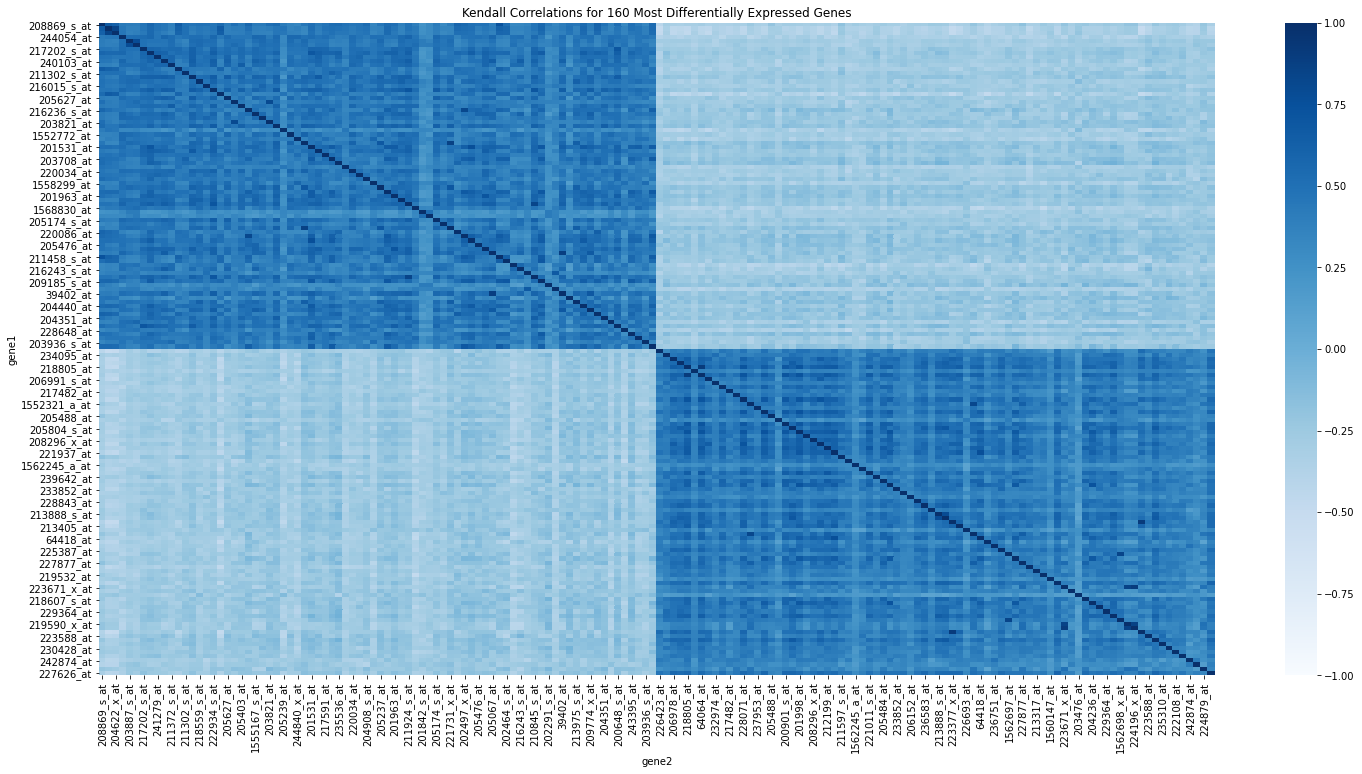

In [25]:
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(corr_matrix, ax=ax, vmin=-1, vmax=1, cmap='Blues')
ax.set(title="Kendall Correlations for 160 Most Differentially Expressed Genes")

#### 2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏? 

Under a null model that assumes all genes are pairwise independent, we would expect all possible permutations of their ranks to be equiprobable. Therefore, we would expect an equal number of concordant and discordant pairs.
Due to the formula for tau:
$\tau = (C-D)/N$

Assuming C=D, the expected value for $\tau$ is 0.

#### 3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.

In [26]:
over = over[:80]
results_kendall_overexpressed = {}
for gene1, row1 in over.iterrows():
    for gene2, row2 in over.iterrows():

        if (gene1 != gene2) and (gene1 +'@'+ gene2 not in results_kendall_overexpressed) and (gene2 +'@'+ gene1 not in results_kendall_overexpressed):
            
            # make sure genes aren't the same and that the permutation hasn't been computed already
            # leave the opposite permutation because needed for heatmap
            results = kendalltau(df[gene1], df[gene2])
            results_kendall_overexpressed[gene1 +'@'+ gene2] = results
        

[Text(0.5, 1.0, 'Pairwise Kendall Correlation in 80 Most Overexpressed Genes')]

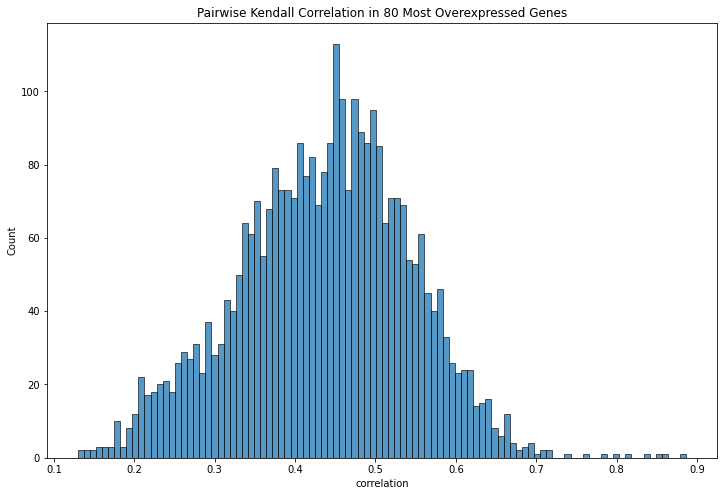

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=pd.DataFrame.from_dict(results_kendall_overexpressed, orient='index')['correlation'],
             ax=ax, 
             bins=100)
ax.set(title="Pairwise Kendall Correlation in 80 Most Overexpressed Genes")

In [28]:
np.mean(pd.DataFrame.from_dict(results_kendall_overexpressed, orient='index')['correlation'])

0.43633375511448963

The average value we observe is 0.44, compared to the null value of 0. This means that in these genes, the M samples are more likely to be the higher ranks than the H samples, as indicated by a moderately positive Kendall correlation. This makes sense as these are the most overexpressed genes, which means they are the most differentially expressed with M samples being more expressed than H samples. We expect these to have a positive Kendall correlation because we expect genes that are overexpressed in disease to be related, and therefore correlated in expression.

#### 4) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)?

We can see from our heatmap that overexpressed genes (genes that tend to be more highly expressed in M samples than healthy samples) tend to be co-expressed. This makes sense - genes that are overexpressed in disease are likely to be related, therefore if one of them is overexpressed we would also expect similar genes to be overexpressed.
We see a similar trend in the underexpressed genes (genes that tend to be less expressed in M samples than healthy samples). This also makes sense because genes that are downregulated in disease are likely to be related, so when one of them is underexpressed the others are also underexpressed.

#### 5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.


If we were to calculate the number of co-expressed pairs in the entire dataset at FDR=0.05, we would have to examine many gene pairs. This would require performing a test to measure differential expression for each of 54628 genes, then computing the kendall correlation between 54628 choose 2 pairs of genes (~1.5 billion pairs!), and checking which of those are co-expressed (based on some pre-determined condition). We would then order all of their p-values, and correct each p-value for FDR=0.05


The function below can be used to calculate the number of coexpressed genes, given an input list of sorted Kendall correlation p-values.

In [29]:
# pvalues = pd.DataFrame.from_dict(results_kendall, orient='index', columns=['gene','pvalue'])
# # sort the p-values
# pvalues = pvalues.sort_values('pvalue')['pvalue']
# len(pvalues)

In [30]:
def calc_fdr(pvalues, fdr):
    coexpressed = 0
    N = len(pvalues)
    
    # want to find the max i that satisfies FDR(i) <= 0.05
    for i, pval in enumerate(pvalues, 1):
        fdr_i = (pval*N)/i
        
        if (fdr_i <= fdr) and (i > coexpressed):
            coexpressed = i
            
    return coexpressed

#### 6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D? 

Advantages:
- Computing co-expression for all genes in the study, rather than only for the most over/under expressed genes, we would be much more thorough in our approach and find many more correlations. Therefore, this would be a lot more comprehensive.
- This would also allow us to find co-expression of genes that have different expression levels. In D, genes are either strongly overexpressed or underexpressed, but these genes may be co-expressed with genes that are not so strongly over or underexpressed. Therefore, this comprehensive approach may let us find more subtle expression changes in disease that can be helpful in understanding the genetic influence behind it.

Disadvantages:
- If we were to compute co-expression for all genes in the study, our results would be inflated with all the genes that are not implicated in disease. These genes will remain at their normal expression levels, and many of them are likely to be "co-expressed", but not actually interesting for our study.
- Similar to the point above, the more genes we examine the more false positives we expect to see - so if we were to compute co-expression for all 1.5 billion pairs of genes, we would expect to see large number of pairs that are co-expressed just by chance.
- As there are so many gene pairs, this will be very computationally expensive.

### D) Plots and Conclusions of the DE and correlation analysis


#### 1) Construct the DE overabundance plots for M vs H overexpression (higher expression levles in M) using WRS and t-test using results from section 3c. 

#### State for each comparison the number of genes, k, at which we observe FDR = [0.05, 0.01, 0.005]. If these events are not observed at any k>0, then make that statement

In [91]:
WRS_pvalue = []
WRS_stat = []
for val in list(results_wilcoxon_over.values()):
    WRS_pvalue.append(val[1])
    WRS_stat.append(val[0])
    
ttest_pvalue = []
ttest_stat = []
for val in list(results_ttest_over.values()):
    ttest_pvalue.append(val[1])
    ttest_stat.append(val[0])  
    
wrs_p = pd.DataFrame(WRS_pvalue).rename({0:"p-value"}, axis=1).join(
    pd.DataFrame(WRS_stat).rename({0:"stat"}, axis=1))
wrs_p = wrs_p.sort_values(by='p-value').reset_index(drop=True).reset_index().rename(
     {"index":"Number of Genes"},axis=1)

tt_p = pd.DataFrame(ttest_pvalue).rename({0:"p-value"}, axis=1).join(
    pd.DataFrame(ttest_stat).rename({0:"stat"}, axis=1))
tt_p = tt_p.sort_values(by='p-value').reset_index(drop=True).reset_index().rename(
     {"index":"Number of Genes"},axis=1)

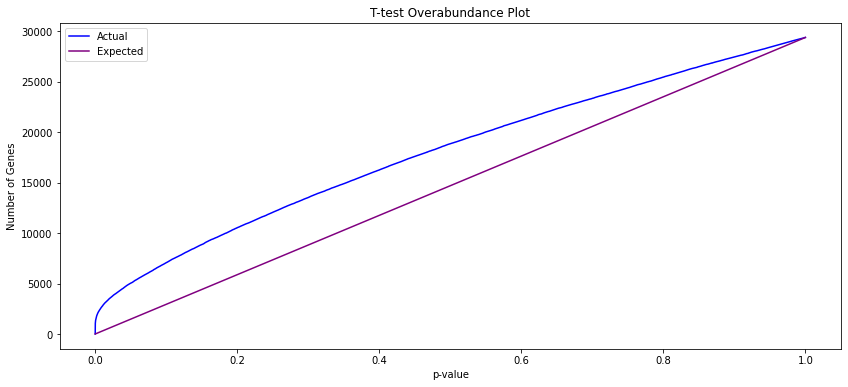

In [113]:
plt.figure(figsize=(14,6))

# x_actual = tt_p['p-value'].sort_values().reset_index()['p-value']
x_actual = tt_p[tt_p.stat>=0]['p-value'].sort_values().reset_index()['p-value']*2

y_actual = np.arange(x_actual.shape[0])
plt.plot(x_actual, y_actual, color="blue", label='Actual')

x_expected = np.linspace(0, 1, x_actual.shape[0])
y_expected =  np.arange(x_actual.shape[0])
plt.plot(x_expected, y_expected, color="purple", label='Expected')

plt.title("T-test Overabundance Plot")
plt.xlabel("p-value")
plt.ylabel("Number of Genes")
plt.legend()
plt.show()

In [68]:
print("There are " + str(calc_fdr(tt_p['p-value'], 0.05)) + " genes with FDR 0.05 using T-test" )
print("There are " + str(calc_fdr(tt_p['p-value'], 0.01)) + " genes with FDR 0.01 using T-test" )
print("There are " + str(calc_fdr(tt_p['p-value'], 0.005)) + " genes with FDR 0.005 using T-test" )

There are 2104 genes with FDR 0.05 using T-test
There are 1305 genes with FDR 0.01 using T-test
There are 1104 genes with FDR 0.005 using T-test


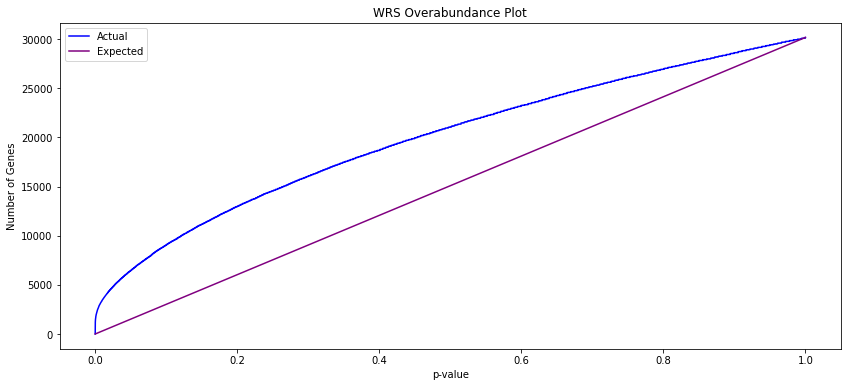

In [115]:
plt.figure(figsize=(14,6))

# x_actual = wrs_p['p-value'].sort_values().reset_index()['p-value']
x_actual = wrs_p[wrs_p.stat>=0]['p-value'].sort_values().reset_index()['p-value']*2

y_actual = np.arange(x_actual.shape[0])
plt.plot(x_actual, y_actual, color="blue", label='Actual')

x_expected = np.linspace(0, 1, x_actual.shape[0])
y_expected =  np.arange(x_actual.shape[0])
plt.plot(x_expected, y_expected, color="purple", label='Expected')

plt.title("WRS Overabundance Plot")
plt.xlabel("p-value")
plt.ylabel("Number of Genes")
plt.legend()
plt.show()

In [69]:
print("There are " + str(calc_fdr(wrs_p['p-value'], 0.05)) + " genes with FDR 0.05 using WRS" )
print("There are " + str(calc_fdr(wrs_p['p-value'], 0.01)) + " genes with FDR 0.01 using WRS" )
print("There are " + str(calc_fdr(wrs_p['p-value'], 0.005)) + " genes with FDR 0.005 using WRS" )

There are 2808 genes with FDR 0.05 using WRS
There are 1601 genes with FDR 0.01 using WRS
There are 1323 genes with FDR 0.005 using WRS


#### 2) Select any three differentially expressed genes, from D (defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

In [48]:
["216016_at", "201842_s_at", "239085_at"]

['216016_at', '201842_s_at', '239085_at']

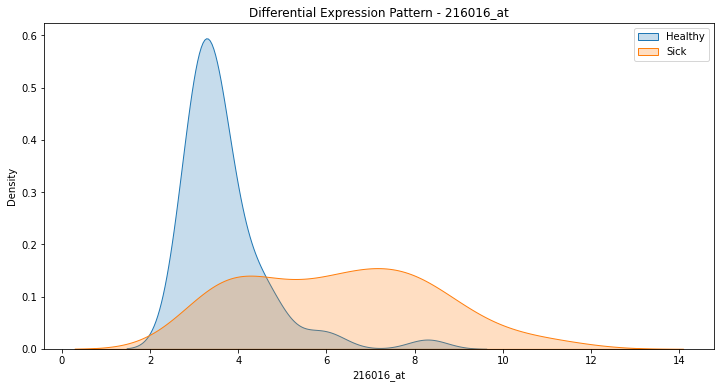

In [108]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df["Class"] == "H"]["216016_at"], label="Healthy", shade=True) 
sns.kdeplot(df[df["Class"] == "M"]["216016_at"], label="Sick", shade=True)
plt.legend()
plt.title("Differential Expression Pattern - 216016_at");

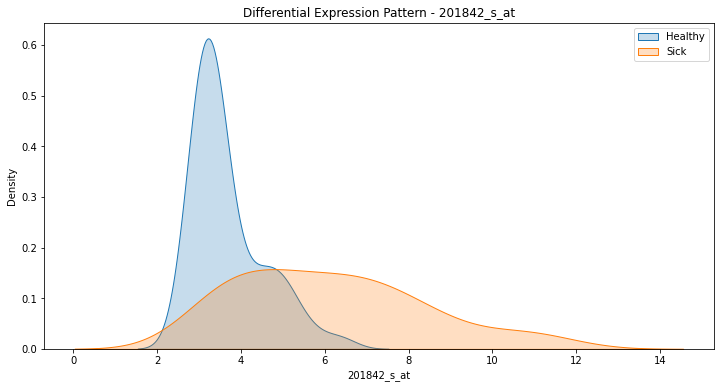

In [107]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df["Class"] == "H"]["201842_s_at"], label="Healthy", shade=True)
sns.kdeplot(df[df["Class"] == "M"]["201842_s_at"], label="Sick", shade=True)
plt.legend()
plt.title("Differential Expression Pattern - 201842_s_at");

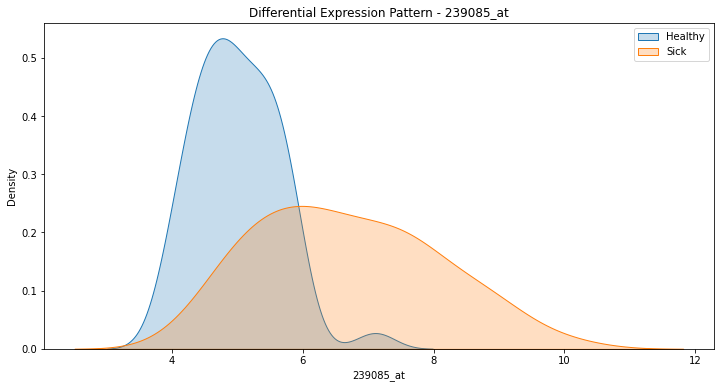

In [106]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df["Class"] == "H"]["239085_at"], label="Healthy", shade=True)
sns.kdeplot(df[df["Class"] == "M"]["239085_at"], label="Sick", shade=True)
plt.legend()
plt.title("Differential Expression Pattern - 239085_at");

#### 3) Draw a heatmap respresentation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce maximal visual effect.

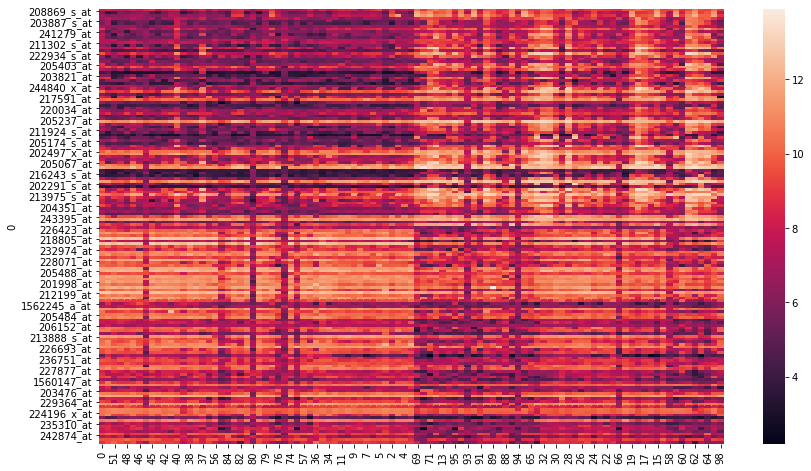

In [52]:
gene_names = list(D.index)
gene_names.append("Class")
df[gene_names].sort_values("Class")
res = df[gene_names].sort_values("Class")
plt.figure(figsize=(14,8))
sns.heatmap(res.drop("Class", axis=1).transpose());